<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [6]:
data['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

In [7]:
# Dividir los datos en cuatro conjuntos según el valor de "dataset"
ds1 = data[data['dataset'] == 'Grupo_I']
ds2 = data[data['dataset'] == 'Grupo_II']
ds3 = data[data['dataset'] == 'Grupo_III']
ds4 = data[data['dataset'] == 'Grupo_IV']

In [9]:
data1 = data[data['dataset']=='I'].drop('dataset',axis=1)
display(data1.head())
data2 = data[data['dataset']=='II'].drop('dataset',axis=1)
display(data2.head())
data3 = data[data['dataset']=='III'].drop('dataset',axis=1)
display(data3.head())
data4 = data[data['dataset']=='IV'].drop('dataset',axis=1)
display(data4.head())

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


,x,y
11,10.0,9.14
12,8.0,8.14
13,13.0,8.74
14,9.0,8.77
15,11.0,9.26


,x,y
22,10.0,7.46
23,8.0,6.77
24,13.0,12.74
25,9.0,7.11
26,11.0,7.81


,x,y
33,8.0,6.58
34,8.0,5.76
35,8.0,7.71
36,8.0,8.84
37,8.0,8.47


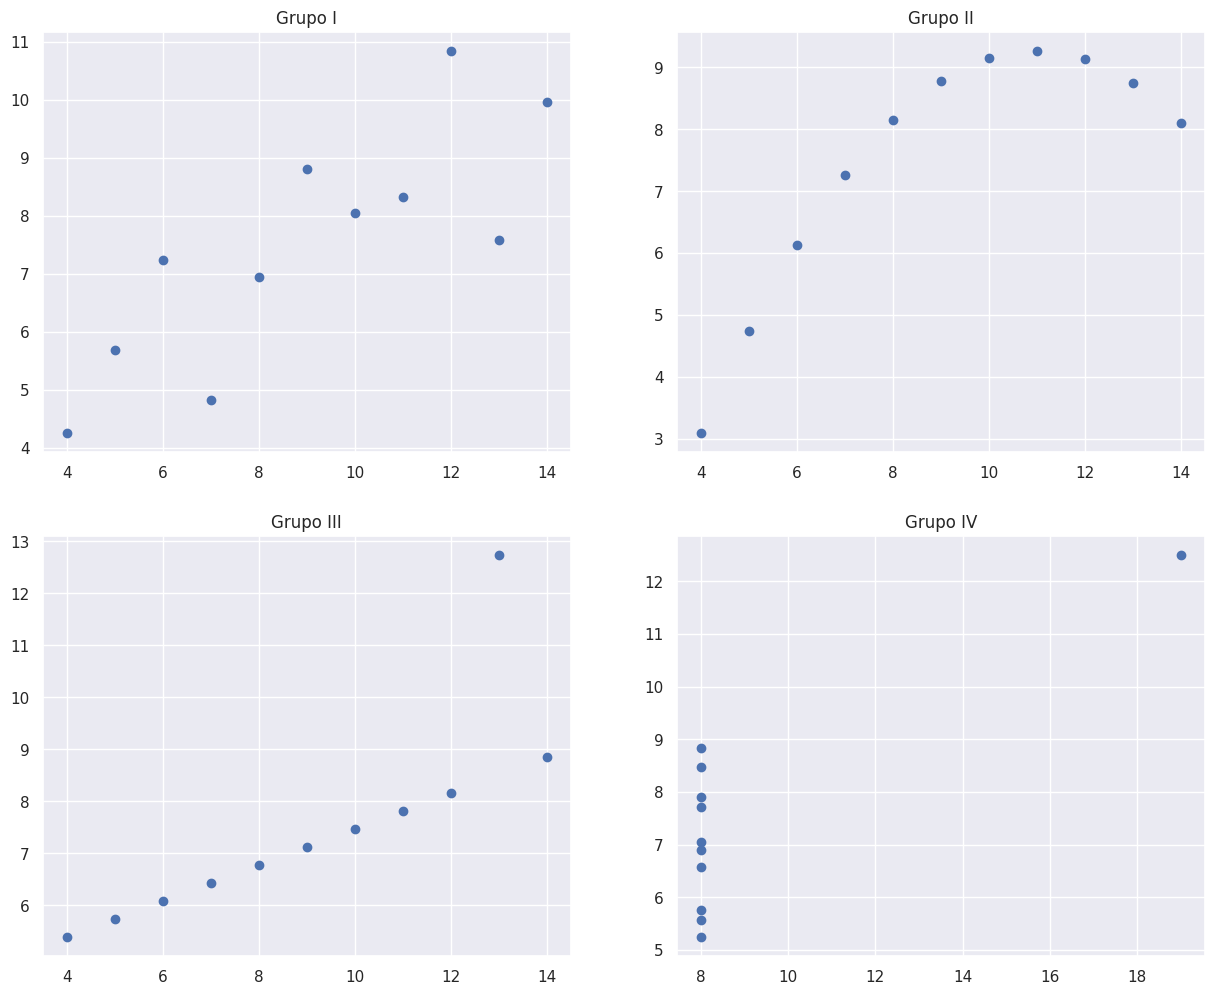

In [11]:
# Aqui colocar grafico
fig = plt.figure(figsize=(15,12))

#Primer grafico
plt.subplot(2,2,1)
x1 = data1['x']
y1 = data1['y']
plt.scatter(x1,y1)
plt.title('Grupo I')

#Segundo grafico
plt.subplot(2,2,2)
x2 = data2['x']
y2 = data2['y']
plt.scatter(x2,y2)
plt.title('Grupo II')

#Tercer grafico
plt.subplot(2,2,3)
x3 = data3['x']
y3 = data3['y']
plt.scatter(x3,y3)
plt.title('Grupo III')

#Cuarto grafico
plt.subplot(2,2,4)
x4 = data4['x']
y4 = data4['y']
plt.scatter(x4,y4)
plt.title('Grupo IV')

plt.show()

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [13]:
# De dataset I
data1.describe()


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [14]:
# De dataset II
data2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [15]:
# De dataset III
data3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [16]:
# De dataset IV
data4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

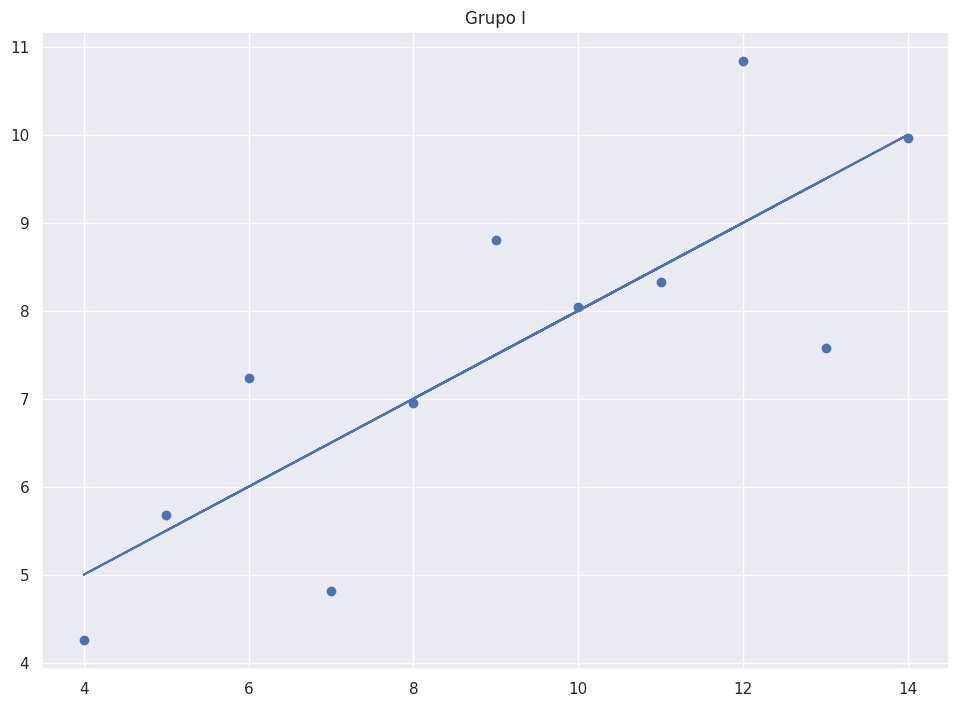

In [21]:
# Para Grupo I

X1 = data1.drop('y',axis=1)
Y1 = data1['y']

#Definimos modelo
modelo1 = LinearRegression()

#Entrenamos modelo
modelo1.fit(X1,Y1)

pred1 = modelo1.predict(X1)

#Se grafica
plt.scatter(X1,Y1)
plt.plot(X1, pred1)
plt.title('Grupo I')

plt.show()

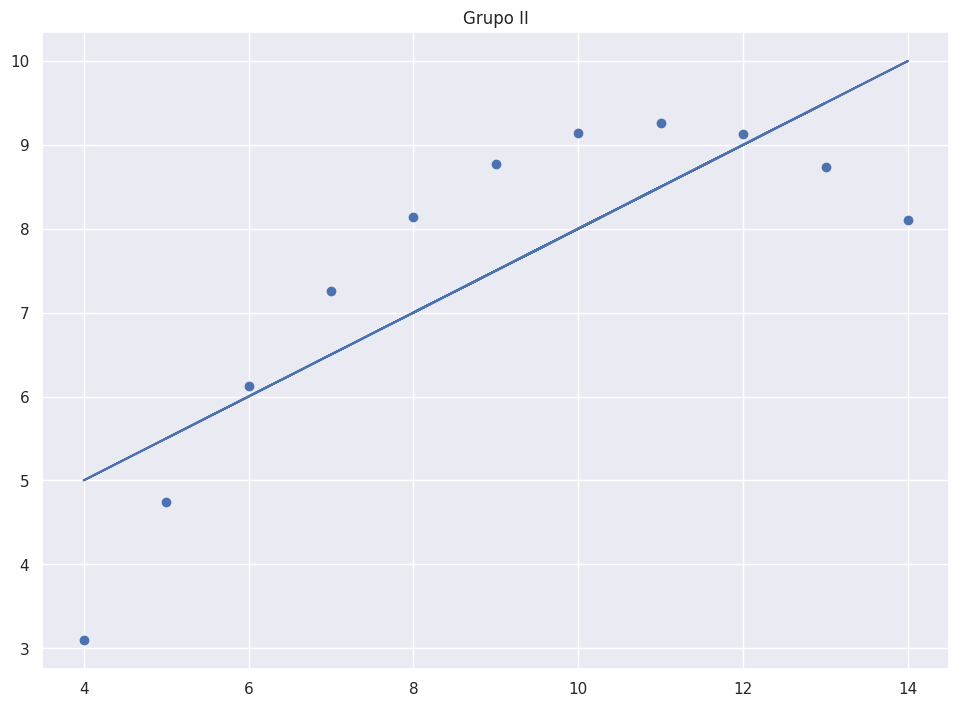

In [22]:
# Para Grupo II

X2 = data2.drop('y',axis=1)
Y2 = data2['y']

#Definimos modelo
modelo2 = LinearRegression()

#Entrenamos modelo
modelo2.fit(X2,Y2)

pred2 = modelo2.predict(X2)

#Se grafica
plt.scatter(X2,Y2)
plt.plot(X2, pred2)
plt.title('Grupo II')

plt.show()

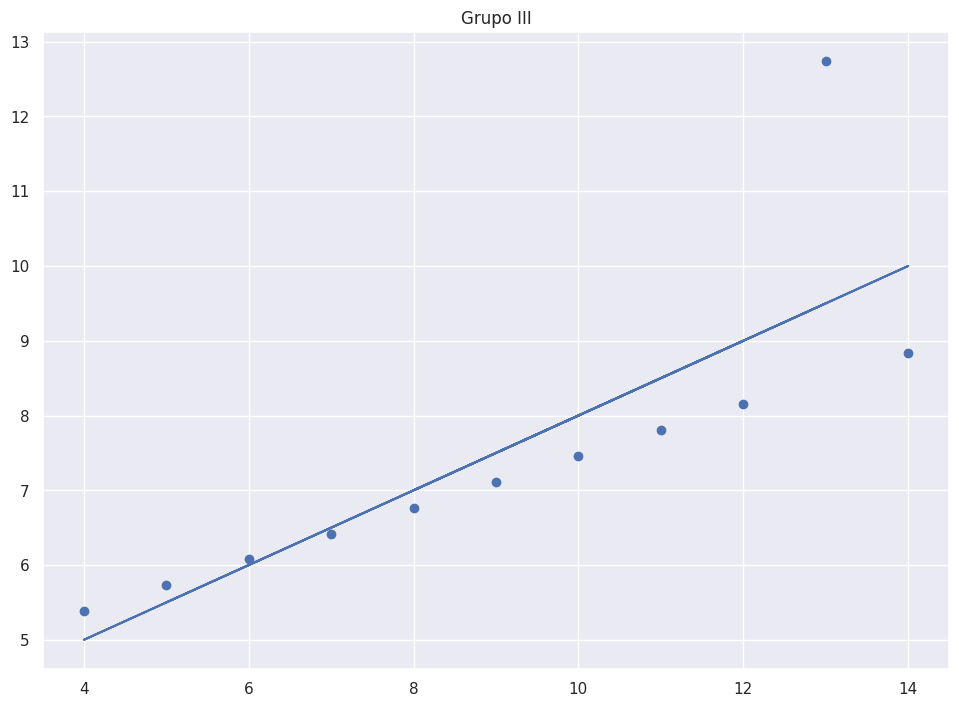

In [23]:
# Para Grupo III

X3 = data3.drop('y',axis=1)
Y3 = data3['y']

#Definimos modelo
modelo3 = LinearRegression()

#Entrenamos modelo
modelo3.fit(X3,Y3)

pred3 = modelo3.predict(X3)

#Se grafica
plt.scatter(X3,Y3)
plt.plot(X3, pred3)
plt.title('Grupo III')

plt.show()

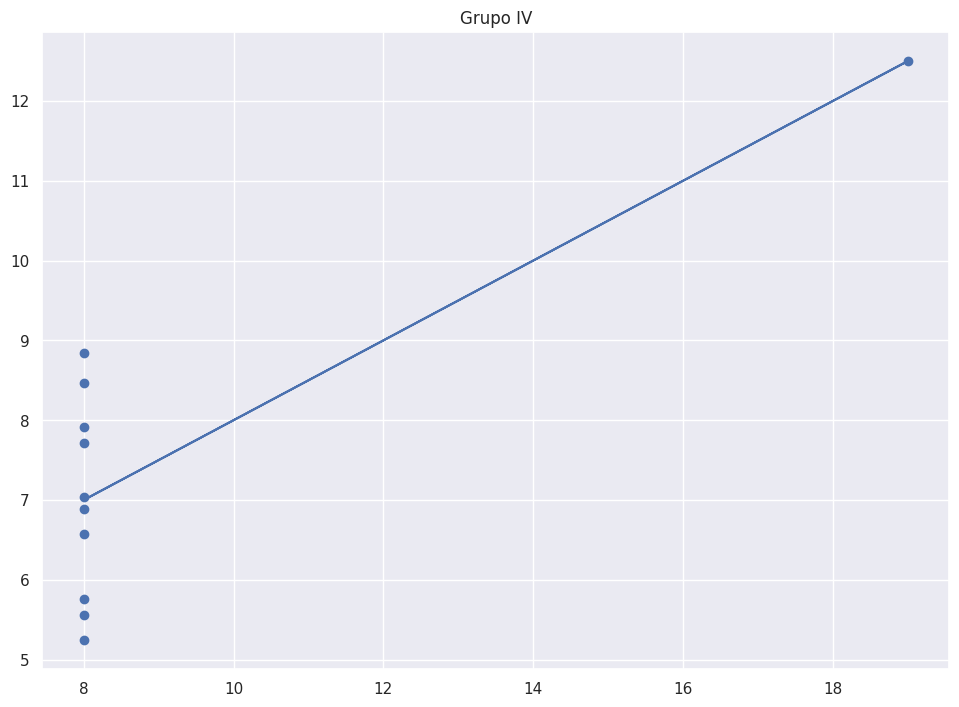

In [24]:
# Para Grupo IV

X4 = data4.drop('y',axis=1)
Y4 = data4['y']

#Definimos modelo
modelo4 = LinearRegression()

#Entrenamos modelo
modelo4.fit(X4,Y4)

pred4 = modelo4.predict(X4)

#Se grafica
plt.scatter(X4,Y4)
plt.plot(X4, pred4)
plt.title('Grupo IV')

plt.show()

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

In [32]:
# Funcion para calcular el R^2
def rsquared(y, yhat) -> float:
    metrica = 0

    suma_y=sum(y)
    n=len(y)
    prom_y=suma_y/n

    SSreg=sum((yhat-prom_y)**2)
    SSres=sum((y-yhat)**2)
    SStot=SSres+SSreg

    metrica = SSreg/SStot

    return metrica

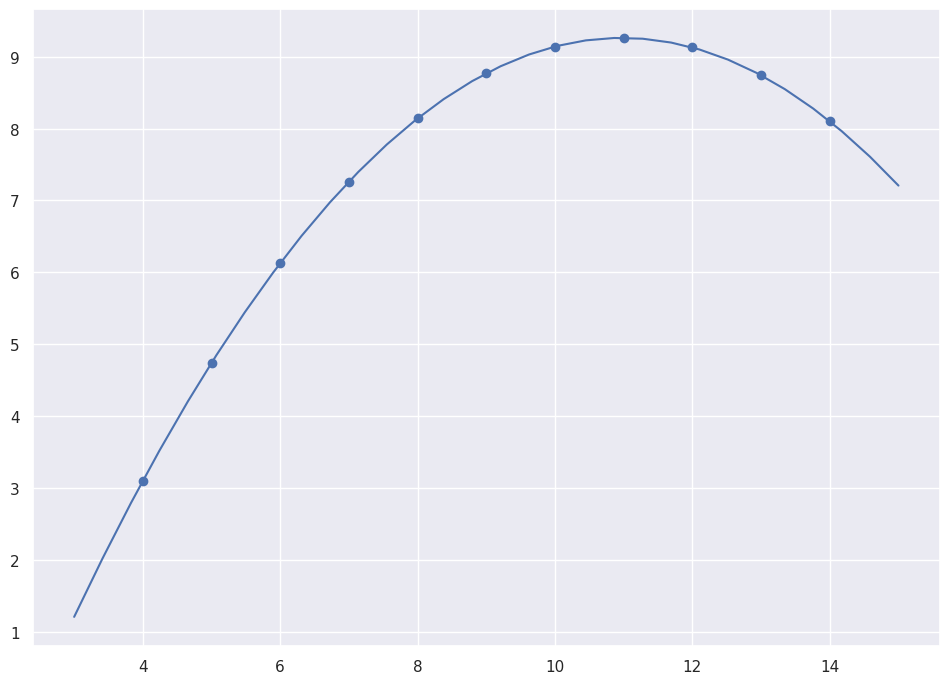

0.999999457857722

In [29]:
#Podemos crear un ajuste polinomico para el grupo 2
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x=data2['x'] #fijamos el eje x
y=data2['y'] #fijamos el eje
line = np.linspace(3,15,30)
polymodel = np.poly1d(np.polyfit(x, y, 2)) #reajustamos el modelo con un polinomio de grado 2

plt.scatter(x, y) #graficamos los puntos
plt.plot(line, polymodel(line)) #graficamos el polinomio
plt.show()

rsquared(np.array(y), np.array(polymodel(x))) #además, podemos ver el r^2 para el reajuste

El valor de R^2 para este modelo es cercano a 1, por lo que el ajuste realizado es bueno.

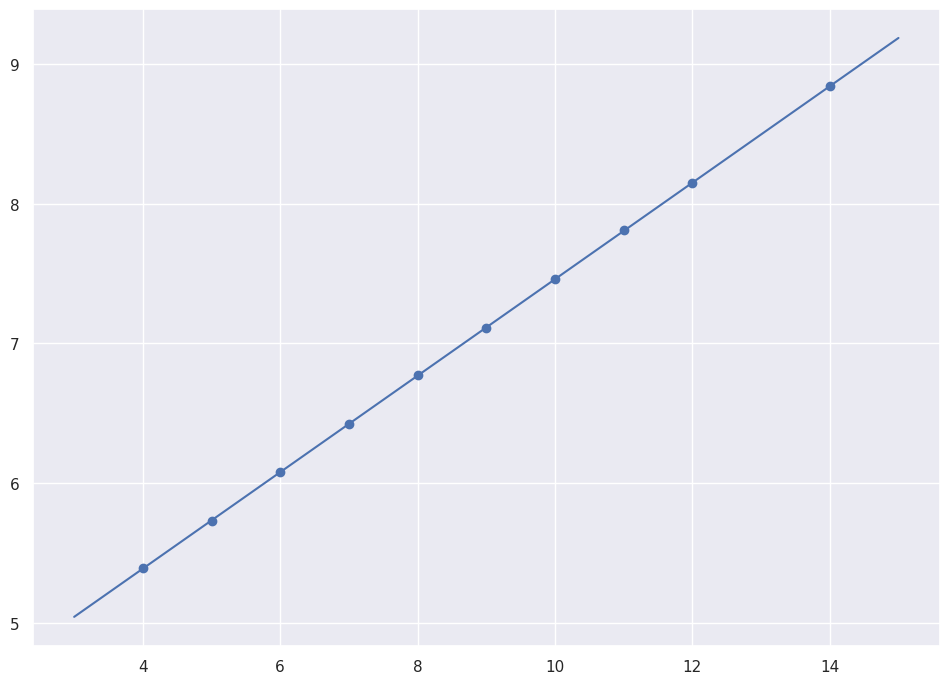

0.9999931075815331

In [31]:
#Podemos quitar un dato al grupo 3
NewData3 = data3.drop(24) #Quitamos el dato
x = NewData3["x"]
y = NewData3["y"]
linearmodel = np.poly1d(np.polyfit(x, y, 1)) #creamos un reajuste polinomial de grado 1
line = np.linspace(3,15,30)
plt.scatter(x, y)
plt.plot(line, linearmodel(line))
plt.show()

rsquared(np.array(y), np.array(linearmodel(x))) #además, podemos ver el r^2 para el reajuste

El valor de R^2 para este modelo es cercano a 1, por lo que el ajuste realizado es bueno.